In [4]:
import os
import pandas as pd
import numpy as np

In [5]:
RAVDESS = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
CREMA = "cremad/AudioWAV/"
TESS = "toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
SAVEE = "surrey-audiovisual-expressed-emotion-savee/ALL/"

In [6]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])
            
ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()

,path,sex,emotion
0,ravdess-emotional-speech-audio/audio_speech_ac...,female,angry
1,ravdess-emotional-speech-audio/audio_speech_ac...,female,fear
2,ravdess-emotional-speech-audio/audio_speech_ac...,female,fear
3,ravdess-emotional-speech-audio/audio_speech_ac...,female,angry
4,ravdess-emotional-speech-audio/audio_speech_ac...,female,disgust


In [7]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018', 
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047', 
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072', 
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,cremad/AudioWAV/1028_IEO_SAD_HI.wav,female,sad
1,cremad/AudioWAV/1048_IEO_ANG_HI.wav,male,angry
2,cremad/AudioWAV/1027_IEO_DIS_HI.wav,male,disgust
3,cremad/AudioWAV/1032_IEO_DIS_HI.wav,male,disgust
4,cremad/AudioWAV/1080_IEO_HAP_HI.wav,male,happy


In [8]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = [] 

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}{directory}/{audio_file}") 
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])
            
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,toronto-emotional-speech-set-tess/tess toronto...,female,disgust
1,toronto-emotional-speech-set-tess/tess toronto...,female,disgust
2,toronto-emotional-speech-set-tess/tess toronto...,female,disgust
3,toronto-emotional-speech-set-tess/tess toronto...,female,disgust
4,toronto-emotional-speech-set-tess/tess toronto...,female,disgust


In [9]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])
        
savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()

,path,sex,emotion
0,surrey-audiovisual-expressed-emotion-savee/ALL...,male,sad
1,surrey-audiovisual-expressed-emotion-savee/ALL...,male,sad
2,surrey-audiovisual-expressed-emotion-savee/ALL...,male,neutral
3,surrey-audiovisual-expressed-emotion-savee/ALL...,male,neutral
4,surrey-audiovisual-expressed-emotion-savee/ALL...,male,neutral


In [10]:
df = pd.concat([
    ravdess_df, 
    crema_df, 
    tess_df, 
    savee_df
], axis=0)
df.head()

,path,sex,emotion
0,ravdess-emotional-speech-audio/audio_speech_ac...,female,angry
1,ravdess-emotional-speech-audio/audio_speech_ac...,female,fear
2,ravdess-emotional-speech-audio/audio_speech_ac...,female,fear
3,ravdess-emotional-speech-audio/audio_speech_ac...,female,angry
4,ravdess-emotional-speech-audio/audio_speech_ac...,female,disgust


In [11]:
import librosa
import matplotlib.pyplot as plt

plt.style.use('ggplot')

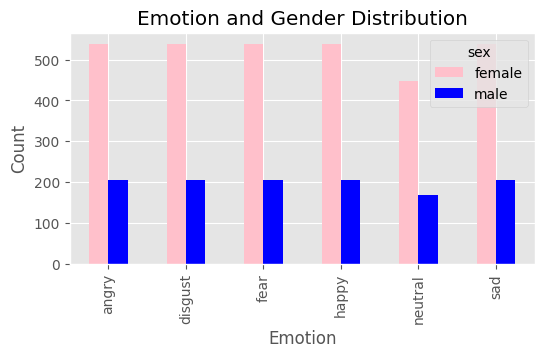

In [12]:
def plot_distribution(df): 
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(6, 3), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()
    
plot_distribution(df)

In [13]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
0,ravdess-emotional-speech-audio/audio_speech_ac...,angry
1,ravdess-emotional-speech-audio/audio_speech_ac...,fear
2,ravdess-emotional-speech-audio/audio_speech_ac...,fear
3,ravdess-emotional-speech-audio/audio_speech_ac...,angry
4,ravdess-emotional-speech-audio/audio_speech_ac...,disgust


In [14]:
from IPython.display import Audio

def create_waveplot(y, sr, title):
    plt.figure(figsize=(8, 2))
    plt.title(title)
    librosa.display.waveshow(y, sr=sr)
    plt.show()

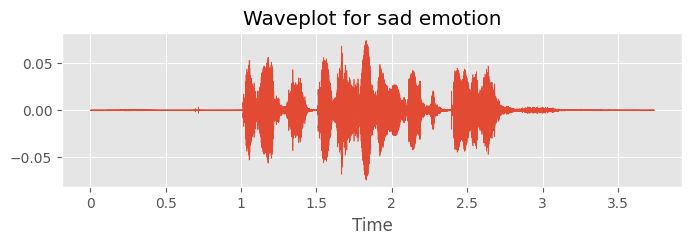

In [15]:
emotion_label = 'sad'
title = f"Waveplot for {emotion_label} emotion"
path = np.array(df.path[df.emotion == emotion_label])[1]
y, sr = librosa.load(path)

create_waveplot(y, sr, title)
Audio(path)

In [17]:
%pip install ffmpeg

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/warc-0.2.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from pydub import AudioSegment, effects

In [19]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [20]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

In [21]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

Failed for path: ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/JK_sa01.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/JK_sa15.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/JE_sa08.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/JK_f15.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/KL_sa13.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/DC_h15.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/DC_h14.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/KL_sa12.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/DC_n06.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/JK_sa14.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/ALL/JK_sa02.wav
Failed for path: surrey-audiovisual-expressed-emotion-savee/

In [22]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

In [50]:
from tensorflow.keras.models import load_model

model = load_model('model/model_24112024_400_2.h5')

In [57]:
print(model.history.history.keys())

dict_keys([])


KeyError: 'loss'

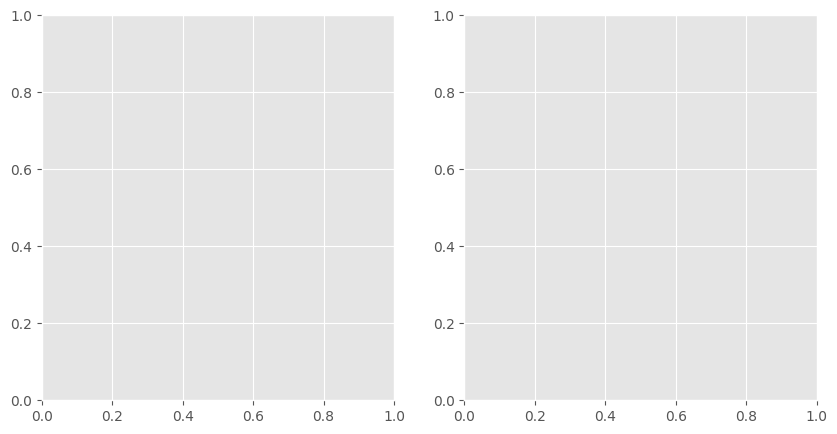

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Access loss values
axes[0].plot(model.history.history['loss'], label='Train Loss')
axes[0].plot(model.history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Add another plot if needed
axes[1].plot(model.history.history['accuracy'], label='Train Accuracy')
axes[1].plot(model.history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.12, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
y_val = np.squeeze(y_val)

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        50
           1       0.80      0.82      0.81        45
           2       0.78      0.82      0.80        61
           3       0.73      0.92      0.81        72
           4       0.87      0.75      0.80        55
           5       0.88      0.73      0.80        71

    accuracy                           0.80       354
   macro avg       0.81      0.80      0.80       354
weighted avg       0.81      0.80      0.80       354



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


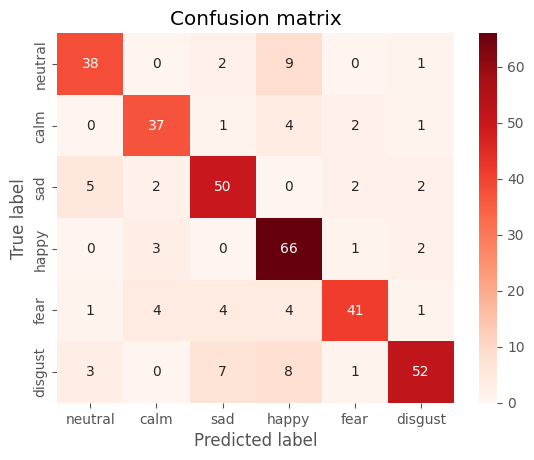

In [54]:
y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_val), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust']
cm = confusion_matrix(np.argmax(y_val_class, axis=1), y_pred, labels=range(6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()